Hello everybody,
in this exploratory analysis we are gonna investigate the similarities and the differences between a declining first world country (Italy, my homeland) and a rising third world one (my beloved Brazil)

This analysis will be driven by the data themselves, I’m not gonna use common knowledge about economic factors but the indicators under scrutiny will be chosen by statistical inquiries

I want to point out that I have allowed myself 5 hours tops to conduct this project, and I beg you to pardon me any English mistakes

First we import the necessary packages

In [1]:
import pandas as pd
import numpy as np
from ggplot import *

C:\Users\JohnJohn\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\JohnJohn\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\JohnJohn\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The we read in the dataframe obtained from https://www.kaggle.com/worldbank/world-development-indicators as df

In [2]:
df = pd.read_csv('./Indicators.csv')

It is always useful to inspect the dataframe to get a sense of it and to control if the importing succeded

In [3]:
df.shape

(5656458, 6)

In [4]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
df.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [7]:
np.isnan(df['Value']).any() 

False

More informations about indicators can be found here: https://www.kaggle.com/benhamner/indicators-in-data

More informations about the countries can be found here: https://www.kaggle.com/benhamner/countries-in-the-wdi-data

So we are gonna subset the dataframe to only include observations pertaining to the two countries under scrutiny

In [6]:
df = df[(df['CountryName'] == 'Italy') | (df['CountryName'] == 'Brazil')]

Let's perform some basic checks on the success of the operation: number of rows, number of unique country codes and a visual inspection 

In [7]:
df.shape

(61686, 6)

In [8]:
countryCodes = df['CountryCode'].unique().tolist()
len(countryCodes)

2

In [9]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5630,Brazil,BRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,92.046800
5631,Brazil,BRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,86.888705
5632,Brazil,BRA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.865863
5633,Brazil,BRA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.022843
5634,Brazil,BRA,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,20.592814


In [10]:
df.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5649194,Italy,ITA,Time required to register property (days),IC.PRP.DURS,2015,16.0
5649195,Italy,ITA,Time required to start a business (days),IC.REG.DURS,2015,5.5
5649196,Italy,ITA,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,269.0
5649197,Italy,ITA,Time to resolve insolvency (years),IC.ISV.DURS,2015,1.8
5649198,Italy,ITA,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,64.8


Now we could select some indicators to compare the two countries with, but let the numbers decide for us!

In [11]:
ITAstd = df[df['CountryName'] == 'Italy'].groupby('IndicatorName').std()
BRAstd = df[df['CountryName'] == 'Brazil'].groupby('IndicatorName').std()
del ITAstd['Year']
del BRAstd['Year']

In [12]:
ITAstd.sort_values(by = 'Value',ascending = False).head(10)

,Value
IndicatorName,
GDP at market prices (current US$),7.577150e+11
Gross national expenditure (current US$),7.553222e+11
GNI (current US$),7.549058e+11
"GNI, Atlas method (current US$)",7.428277e+11
Gross value added at factor cost (current US$),6.662076e+11
"Stocks traded, total value (current US$)",6.269766e+11
GDP (current LCU),6.138745e+11
GNI (current LCU),6.118830e+11
Gross national expenditure (current LCU),6.104228e+11


In [13]:
BRAstd.sort_values(by = 'Value', ascending = False).head(10)

,Value
IndicatorName,
Net domestic credit (current LCU),1.660472e+12
Gross national expenditure (current LCU),1.528376e+12
GDP (current LCU),1.510974e+12
GNI (current LCU),1.476932e+12
Gross value added at factor cost (current LCU),1.285803e+12
Broad money (current LCU),1.249321e+12
Money and quasi money (M2) (current LCU),1.249321e+12
"Final consumption expenditure, etc. (current LCU)",1.220215e+12
Final consumption expenditure (current LCU),1.220215e+12


We decided to use the standard deviation as a measure of how much that indicator changed throughout the years, we could have also used the range or some others more sophisticated, but too burdensome for the confines of this project, methods.

Let's plot the Gross Domestic Products of the two countries, it is a popular indicator and it shows on both the dataframes.

In [14]:
p1 = ggplot(df[df['IndicatorName'] == 'GDP (current LCU)'], aes('Year', 'Value'))+ geom_line() + facet_wrap('CountryName')

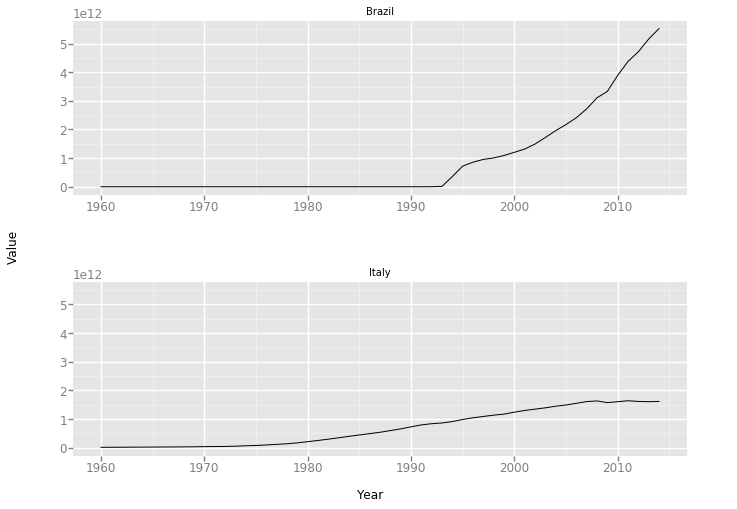

<ggplot: (4436671075)>


In [15]:
print(p1)

WOW! Brazil really took off by the mid nineties, while Italy, never as upward, started to slow around the subprimes' crise's years

We are interest in indicators of change, then the ones with "growth" in it can provide some insights

In [16]:
growthFilter = df['IndicatorName'].str.contains("growth")

In [17]:
growthInd = df[growthFilter]
growthInd['IndicatorName'].unique().tolist()

['Population growth (annual %)',
 'Rural population growth (annual %)',
 'Urban population growth (annual %)',
 'Exports of goods and services (annual % growth)',
 'Final consumption expenditure, etc. (annual % growth)',
 'GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'General government final consumption expenditure (annual % growth)',
 'GNI growth (annual %)',
 'GNI per capita growth (annual %)',
 'Gross capital formation (annual % growth)',
 'Household final consumption expenditure (annual % growth)',
 'Household final consumption expenditure per capita growth (annual %)',
 'Household final consumption expenditure, etc. (annual % growth)',
 'Imports of goods and services (annual % growth)',
 'Gross fixed capital formation (annual % growth)',
 'Agriculture, value added (annual % growth)',
 'Industry, value added (annual % growth)',
 'Services, etc., value added (annual % growth)',
 'Adjusted net national income (annual % growth)',
 'Adjusted net national income per ca

There are some interesting indicators amongst those, I'm going to focus on Adjusted net national income and Household final consumption expenditure

In [18]:
p2 = ggplot(df[df['IndicatorName'] == 'Adjusted net national income (annual % growth)'], aes('Year', 'Value'))+ geom_line() + facet_wrap('CountryName')

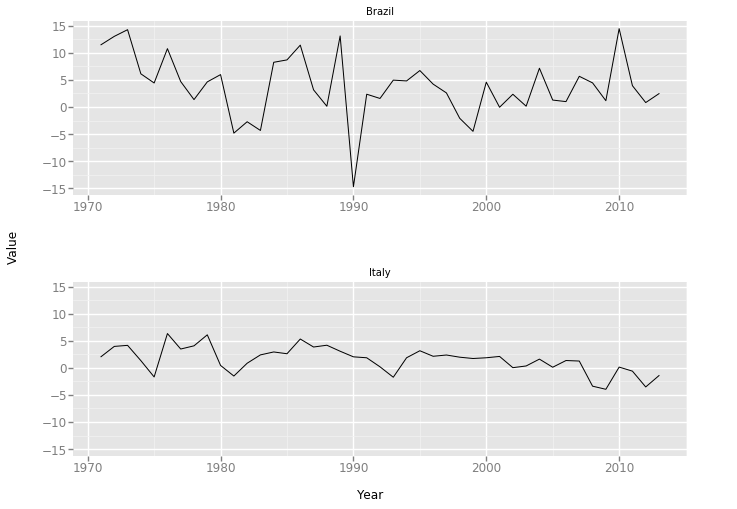

<ggplot: (4437036783)>


In [19]:
print(p2)

This is the power of plotting, we can immediately see the differences between the two countries, with Italy having a very smooth tendency, with a little of a nosedive by the infaumous 2008, and Brazil steadily over 0% over the past 10 years.

In [20]:
p3 = ggplot(df[df['IndicatorName'] == 'Household final consumption expenditure (annual % growth)'], aes('Year', 'Value'))+ geom_line() + facet_wrap('CountryName')

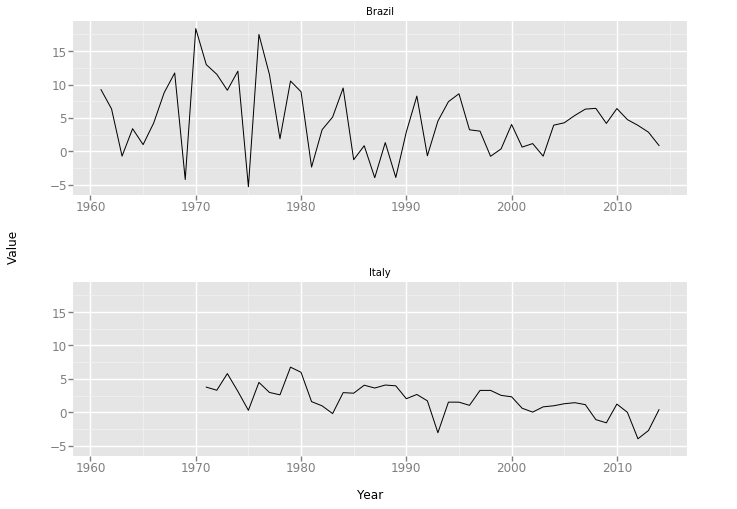

<ggplot: (4437276445)>


In [21]:
print(p3)

If we were to perform a linear regression for the Italy graph, we would aknowledge with more precision its declining trend from the aftermath of the "Economic Boom" years of the fifties, while Brazil shows a strong and steady growth in the 2000s.

Let's now investigate the strong and weak points of each country

In [22]:
ITAmax = df[df['CountryName'] == 'Italy'].groupby('IndicatorName').max()
BRAmax = df[df['CountryName'] == 'Brazil'].groupby('IndicatorName').max()
del ITAmax['Year']
del ITAmax['CountryName']
del ITAmax['CountryCode']
del ITAmax['IndicatorCode']
del BRAmax['Year']
del BRAmax['CountryName']
del BRAmax['CountryCode']
del BRAmax['IndicatorCode']

In [23]:
ITAmax.sort_values(by = 'Value',ascending = False).head()

,Value
IndicatorName,
Gross national expenditure (current US$),2.410737e+12
GDP at market prices (current US$),2.391876e+12
GNI (current US$),2.369489e+12
"Stocks traded, total value (current US$)",2.302036e+12
"GNI, Atlas method (current US$)",2.237958e+12


In [24]:
BRAmax.sort_values(by = 'Value',ascending = False).head()

,Value
IndicatorName,
Net domestic credit (current LCU),5.977780e+12
Gross national expenditure (current LCU),5.673473e+12
GDP (current LCU),5.521256e+12
GNI (current LCU),5.434786e+12
Gross value added at factor cost (current LCU),4.718903e+12


Let's examine the Gross national expenditure (but in US dollars) for both country

In [25]:
p4 = ggplot(df[df['IndicatorName'] == 'Gross national expenditure (current US$)'], aes('Year', 'Value'))+ geom_line() + facet_wrap('CountryName')

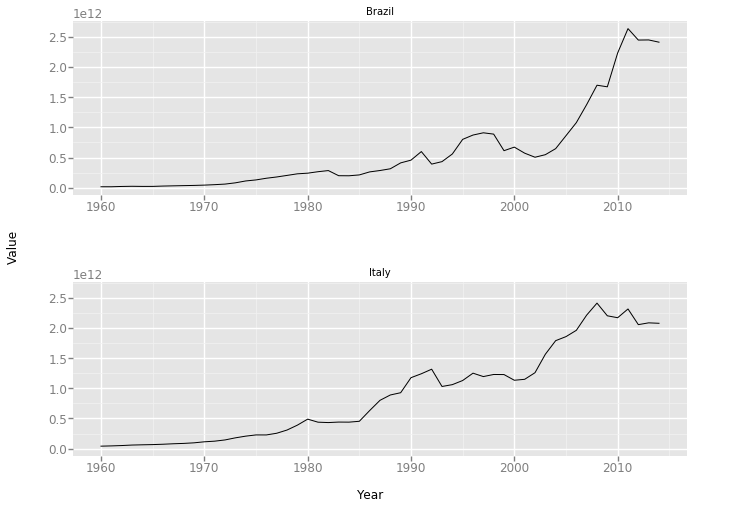

<ggplot: (-9223372032417468514)>


In [26]:
print(p4)

It shows a somehow similar trend; Brazil started later but continued to grow also past the 2010 mark

In [27]:
ITAmin = df[df['CountryName'] == 'Italy'].groupby('IndicatorName').min()
BRAmin = df[df['CountryName'] == 'Brazil'].groupby('IndicatorName').min()
del ITAmin['Year']
del ITAmin['CountryName']
del ITAmin['CountryCode']
del ITAmin['IndicatorCode']
del BRAmin['Year']
del BRAmin['CountryName']
del BRAmin['CountryCode']
del BRAmin['IndicatorCode']

In [28]:
ITAmin.sort_values(by = 'Value',ascending = False).tail()

,Value
IndicatorName,
External balance on goods and services (current US$),-4.184870e+10
"Current account balance (BoP, current US$)",-7.430360e+10
Cash surplus/deficit (current LCU),-7.664900e+10
"Portfolio Investment, net (BoP, current US$)",-1.068660e+11
"Net financial account (BoP, current US$)",-1.154720e+11


In [29]:
BRAmin.sort_values(by = 'Value',ascending = False).tail()

,Value
IndicatorName,
"Current account balance (BoP, current US$)",-1.039810e+11
Cash surplus/deficit (current LCU),-1.124059e+11
External balance on goods and services (constant LCU),-1.302833e+11
External balance on goods and services (current LCU),-1.522170e+11
Net income from abroad (current LCU),-1.528480e+11


Cash surplus/deficit (current LCU) is the indicator of choice for this segment, and the graph shows both a wider range and a declining trend for Brazil

In [30]:
p5 = ggplot(df[df['IndicatorName'] == 'Cash surplus/deficit (current LCU)'], aes('Year', 'Value'))+ geom_line() + facet_wrap('CountryName')

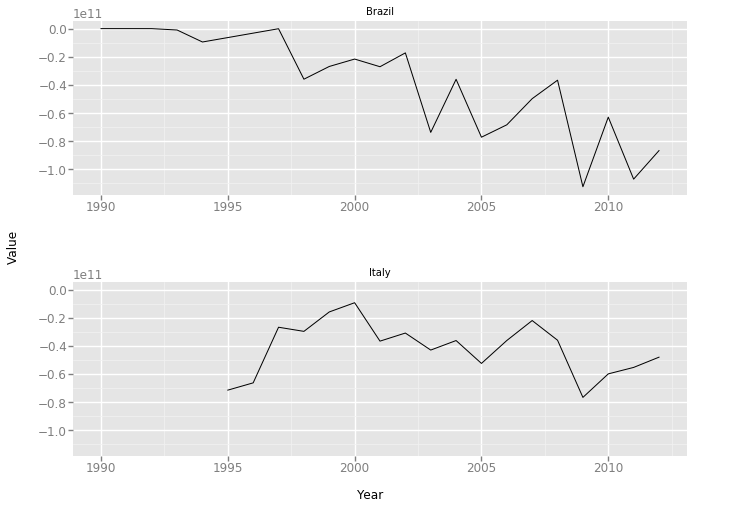

<ggplot: (4437118924)>


In [31]:
print(p5)

After the highs and lows, let's look for the medians, as the indicators that stayed mostly the same (std circa equal to 0)

In [32]:
ITAmedian = ITAstd.sort_values(by = 'Value', ascending = False).dropna()
ITAmedian[ITAmedian != 0].dropna().sort_values(by = 'Value').head(20)

,Value
IndicatorName,
Coal rents (% of GDP),0.000345
"Youth literacy rate, population 15-24 years, gender parity index (GPI)",0.000704
Lifetime risk of maternal death (%),0.001740
Adjusted savings: mineral depletion (% of GNI),0.003132
Mineral rents (% of GDP),0.005665
Adjusted savings: net forest depletion (% of GNI),0.005809
"Gross enrolment ratio, primary, gender parity index (GPI)",0.009584
CO2 emissions (kg per 2011 PPP $ of GDP),0.014793
"Gross enrolment ratio, primary and secondary, gender parity index (GPI)",0.024024


In [33]:
BRAmedian = BRAstd.sort_values(by = 'Value', ascending = False).dropna()
BRAmedian[BRAmedian != 0].dropna().sort_values(by = 'Value').head(20)

,Value
IndicatorName,
"Currency composition of PPG debt, SDR (%)",0.001228
Agricultural irrigated land (% of total agricultural land),0.004871
Coal rents (% of GDP),0.006531
"Youth literacy rate, population 15-24 years, gender parity index (GPI)",0.008410
CO2 emissions (kg per 2011 PPP $ of GDP),0.009756
"Bound rate, simple mean, all products (%)",0.014337
Arable land (hectares per person),0.019889
"Bound rate, simple mean, manufactured products (%)",0.021731
CO2 emissions (kg per PPP $ of GDP),0.025681


One indicator present in both subsets is Lifetime risk of maternal death(%) and here the graph shows, despite the tremendous improvements of Brazil in the last 25 years, a considerable gap between the two countries.

In [34]:
p6 = ggplot(df[df['IndicatorName'] == 'Lifetime risk of maternal death (%)'], aes('Year', 'Value'))+ geom_line() + facet_wrap('CountryName')

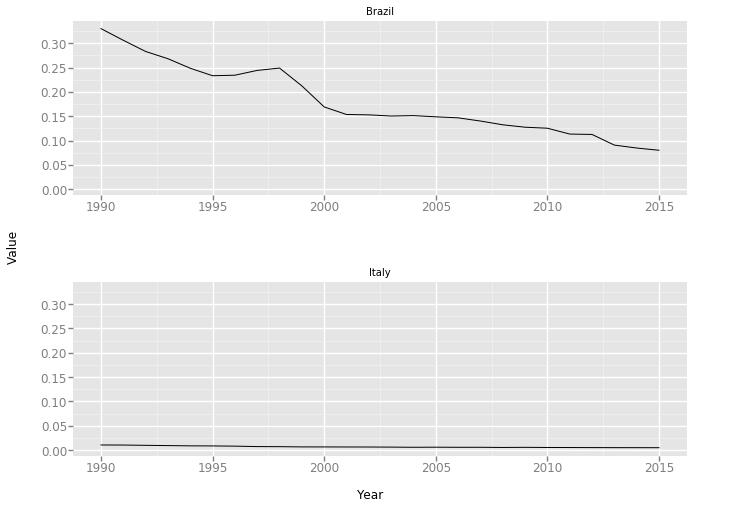

<ggplot: (-9223372032417171452)>


In [35]:
print(p6)

I deem the last part of this analysis the most interesting: by comparing the indicators that had a low variation over the years, we can investigate what truly sets apart the two countries the best, as what didn’t change despite the different cycle the two countries are in.

The next step could be to compare indicators guided by general knowledge instead of just by the data. Like for example focus on indicators related to education, the health system or the environment to see if the economic growth has improved the life standard of Brazil or if the stagnation lowed Italy’s one.